In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [149]:
import pandas as pd
import sklearn

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

data = pd.read_csv('/Users/gunnep/Downloads/corona_full_data.csv', parse_dates=['date'], index_col='date')
data.reset_index(inplace=True)

print(data.head(2))


        date     location  new_cases  new_deaths  total_cases  total_deaths
0 2020-02-25  Afghanistan        NaN         NaN            1           NaN
1 2020-02-26  Afghanistan        0.0         NaN            1           NaN


In [150]:
Italy = pd.DataFrame(data[data['location']=='Italy'])

In [151]:
Germany = pd.DataFrame(data[data['location']=='Germany'])

In [152]:
China = pd.DataFrame(data[data['location']=='China'])

In [153]:
Korea = pd.DataFrame(data[data['location']=='South Korea'])

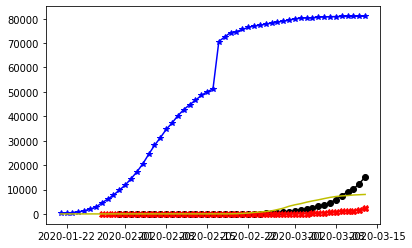

In [154]:
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(Italy['date'],Italy['total_cases'], color='k',marker='o')
plt.plot(Germany['date'],Germany['total_cases'], color='r',marker='X')
plt.plot(China['date'],China['total_cases'], color='b',marker='*')
plt.plot(Korea['date'],Korea['total_cases'], color='y')

In [155]:
#Let's try to fit the two curves
from scipy import optimize

def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

x_data = np.linspace(0, len(Italy), num=len(Italy))

params_exp, params_covariance_exp = optimize.curve_fit(exp_func, x_data,Italy['total_cases'],
                                               p0=[0.1, 0.1, 0.1])

print(params_exp)
print(params_covariance_exp)

[   4.37204067    0.19003591 -131.13870609]
[[ 3.42275106e-01 -1.87201180e-03 -1.36115966e+01]
 [-1.87201180e-03  1.02750640e-05  7.16112209e-02]
 [-1.36115966e+01  7.16112209e-02  1.59546540e+03]]


In [156]:
def log_func(x, a, b, c):
    return a / (1 + np.exp(c*(x + b)))

params_log, params_covariance_log = optimize.curve_fit(log_func, x_data,Italy['total_cases'],
                                               p0=[0.1, 0.1, 0.1])

print(params_log)
print(params_covariance_log)

[ 3.94730261e+04 -4.50765462e+01 -2.42026886e-01]
[[ 1.84080438e+07 -3.18879970e+03  2.78066339e+01]
 [-3.18879970e+03  5.55765577e-01 -4.94617495e-03]
 [ 2.78066339e+01 -4.94617495e-03  4.85434126e-05]]


/Users/gunnep/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


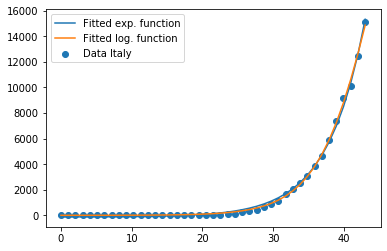

In [157]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, Italy['total_cases'], label='Data Italy')
plt.plot(x_data, exp_func(x_data, params_exp[0], params_exp[1], params_exp[2]),
         label='Fitted exp. function')

plt.plot(x_data, log_func(x_data, params_log[0], params_log[1], params_log[2]),
         label='Fitted log. function')

plt.legend(loc='best')


In [158]:
def calculate_r2(y, y_fit):
    # residual sum of squares
    ss_res = np.sum((y - y_fit) ** 2)
    
    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)

    print(r2)

In [159]:
calculate_r2(Italy['total_cases'],exp_func(x_data, params_exp[0], params_exp[1], params_exp[2]))

0.997467035194906


In [160]:
calculate_r2(Italy['total_cases'],log_func(x_data, params_log[0], params_log[1], params_log[2]))

0.998717630465143


In [180]:
def fit_and_plot(country, china_bool=False):

    x_data = np.linspace(0, len(country), num=len(country))

    params_exp = []

    if(china_bool):
        print(params_exp)
    else:
        params_exp, params_covariance_exp = optimize.curve_fit(exp_func, x_data,country['total_cases'],
                                                       p0=[0.1, 0.1, 0.1])
    
    #print(params_exp)
    #print(params_covariance_exp)
    
    params_log, params_covariance_log = optimize.curve_fit(log_func, x_data,country['total_cases'],
                                               p0=[3.0, 0.1, 0.1])

    #print(params_log)
    #print(params_covariance_log)
    
    return params_exp,params_log,x_data

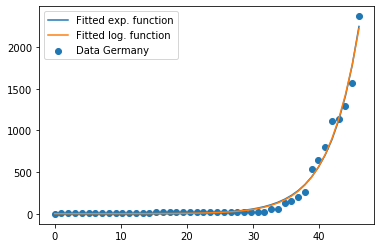

In [181]:
params_exp,params_log,x_data = fit_and_plot(Germany)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, Germany['total_cases'], label='Data Germany')
plt.plot(x_data, exp_func(x_data, params_exp[0], params_exp[1], params_exp[2]),
                 label='Fitted exp. function')

plt.plot(x_data, log_func(x_data, params_log[0], params_log[1], params_log[2]),
                 label='Fitted log. function')

plt.legend(loc='best')

In [182]:
calculate_r2(Germany['total_cases'],exp_func(x_data, params_exp[0], params_exp[1], params_exp[2]))
    
calculate_r2(Germany['total_cases'],log_func(x_data, params_log[0], params_log[1], params_log[2]))

0.9831865804678459
0.9833466889590601


[]


/Users/gunnep/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


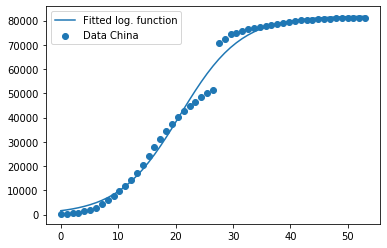

In [183]:
params_exp,params_log,x_data = fit_and_plot(China, True)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, China['total_cases'], label='Data China')

plt.plot(x_data, log_func(x_data, params_log[0], params_log[1], params_log[2]),
                 label='Fitted log. function')

plt.legend(loc='best')

In [184]:
calculate_r2(China['total_cases'],log_func(x_data, params_log[0], params_log[1], params_log[2]))

0.9913585660135767


/Users/gunnep/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


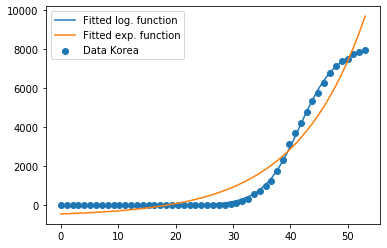

In [185]:
params_exp,params_log,x_data = fit_and_plot(Korea)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, Korea['total_cases'], label='Data Korea')

plt.plot(x_data, log_func(x_data, params_log[0], params_log[1], params_log[2]),
                 label='Fitted log. function')

plt.plot(x_data, exp_func(x_data, params_exp[0], params_exp[1], params_exp[2]),
                 label='Fitted exp. function')

plt.legend(loc='best')

In [186]:
calculate_r2(Korea['total_cases'],exp_func(x_data, params_exp[0], params_exp[1], params_exp[2]))
    
calculate_r2(Korea['total_cases'],log_func(x_data, params_log[0], params_log[1], params_log[2]))

0.9430237052146274
0.9992102593697357
